<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.784881  63.121425  72.281135 -0.012656  193.174784   
      1.0    61.876363  96.821973  41.964002  0.012146  210.674483   
      2.0    73.261895  26.630607  46.865109 -0.037945  156.719666   
      3.0    74.531621  22.442050  32.145912  0.037847  139.157430   
      4.0    48.209026  43.935820  73.197938 -0.012487  175.330297   
...                ...        ...        ...       ...         ...   
999.0 15.0   33.274955  46.577811  42.991800  0.000344  132.844910   
      16.0   36.647611  92.356779  33.415651  0.005349  172.425390   
      17.0   92.972778  44.933858  58.791392 -0.012702  206.685326   
      18.0   84.997084  75.850012  28.226109 -0.016312  199.056892   
      19.0   31.192842  49.205503  30.569650  0.009930  120.977925   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    193.180224 -0.005440  
      1.0    210.659657  0.014827  
      2.0    156.745823 -0.026157  
      3.0    139.103692  0.053737  
      4.0    175.331983 -0.001686  
...                 ...       ...  
999.0 15.0   132.851685 -0.006775  
      16.0   172.436087 -0.010697  
      17.0   206.680713  0.004613  
      18.0   199.068423 -0.011531  
      19.0   120.977792  0.000134  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.784881  63.121425  72.281135 -0.012656  193.174784   
      1.0    61.876363  96.821973  41.964002  0.012146  210.674483   
      2.0    73.261895  26.630607  46.865109 -0.037945  156.719666   
      3.0    74.531621  22.442050  32.145912  0.037847  139.157430   
      4.0    48.209026  43.935820  73.197938 -0.012487  175.330297   
...                ...        ...        ...       ...         ...   
999.0 15.0   33.274955  46.577811  42.991800  0.000344  132.844910   
      16.0   36.647611  92.356779  33.415651  0.005349  172.425390   
      17.0   92.972778  44.933858  58.791392 -0.012702  206.685326   
      18.0   84.997084  75.850012  28.226109 -0.016312  199.056892   
      19.0   31.192842  49.205503  30.569650  0.009930  120.977925   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    193.180224 -0.005440  
      1.0    210.659657  0.014827  
      2.0    156.745823 -0.026157  
      3.0    139.103692  0.053737  
      4.0    175.331983 -0.001686  
...                 ...       ...  
999.0 15.0   132.851685 -0.006775  
      16.0   172.436087 -0.010697  
      17.0   206.680713  0.004613  
      18.0   199.068423 -0.011531  
      19.0   120.977792  0.000134  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.784881,63.121425,72.281135,-0.012656,193.174784,193.180224,-0.005440
1,0.0,1.0,61.876363,96.821973,41.964002,0.012146,210.674483,210.659657,0.014827
2,0.0,2.0,73.261895,26.630607,46.865109,-0.037945,156.719666,156.745823,-0.026157
3,0.0,3.0,74.531621,22.442050,32.145912,0.037847,139.157430,139.103692,0.053737
4,0.0,4.0,48.209026,43.935820,73.197938,-0.012487,175.330297,175.331983,-0.001686
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,33.274955,46.577811,42.991800,0.000344,132.844910,132.851685,-0.006775
19996,999.0,16.0,36.647611,92.356779,33.415651,0.005349,172.425390,172.436087,-0.010697
19997,999.0,17.0,92.972778,44.933858,58.791392,-0.012702,206.685326,206.680713,0.004613
19998,999.0,18.0,84.997084,75.850012,28.226109,-0.016312,199.056892,199.068423,-0.011531


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.784881  63.121425  72.281135 -0.012656  193.174784   
      1.0    61.876363  96.821973  41.964002  0.012146  210.674483   
      2.0    73.261895  26.630607  46.865109 -0.037945  156.719666   
      3.0    74.531621  22.442050  32.145912  0.037847  139.157430   
      4.0    48.209026  43.935820  73.197938 -0.012487  175.330297   
...                ...        ...        ...       ...         ...   
999.0 15.0   33.274955  46.577811  42.991800  0.000344  132.844910   
      16.0   36.647611  92.356779  33.415651  0.005349  172.425390   
      17.0   92.972778  44.933858  58.791392 -0.012702  206.685326   
      18.0   84.997084  75.850012  28.226109 -0.016312  199.056892   
      19.0   31.192842  49.205503  30.569650  0.009930  120.977925   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    193.180224 -0.005440  
      1.0    210.659657  0.014827  
      2.0    156.745823 -0.026157  
      3.0    139.103692  0.053737  
      4.0    175.331983 -0.001686  
...                 ...       ...  
999.0 15.0   132.851685 -0.006775  
      16.0   172.436087 -0.010697  
      17.0   206.680713  0.004613  
      18.0   199.068423 -0.011531  
      19.0   120.977792  0.000134  

[20000 rows x 7 columns]

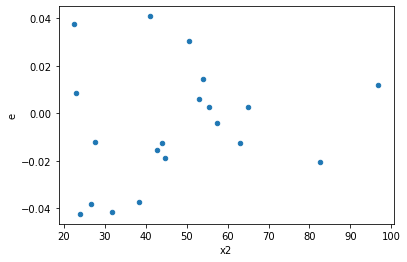

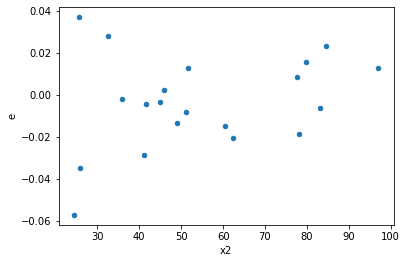

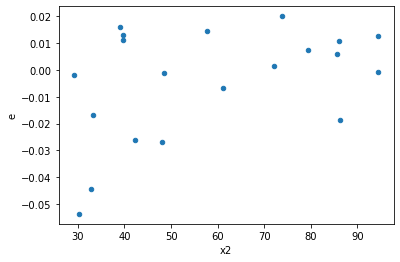

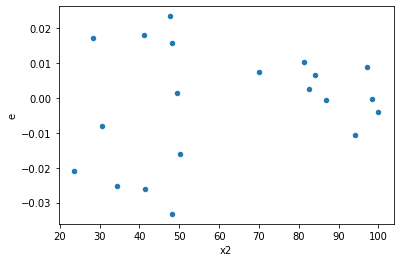

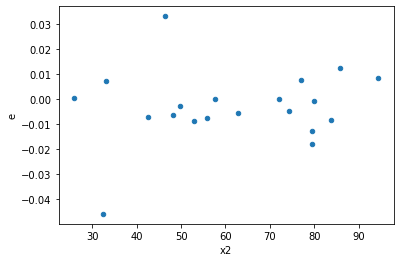

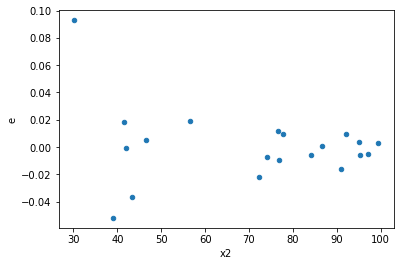

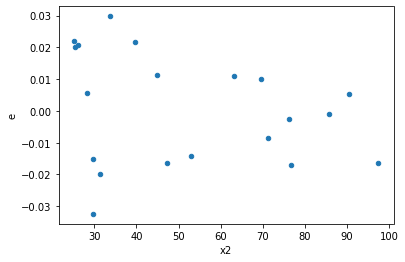

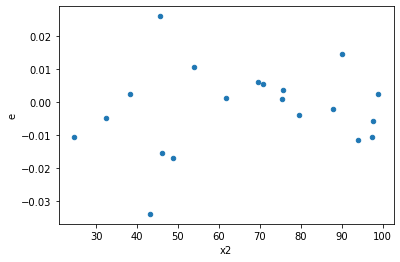

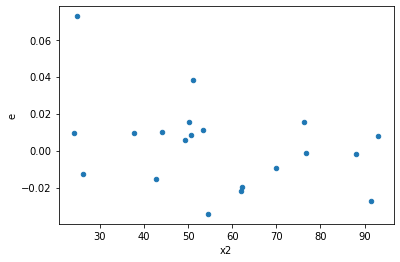

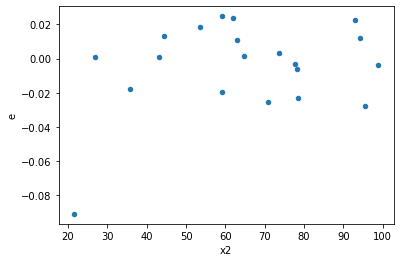

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,0.0010343940559324044,0.001589903156319543,0.00014777057941891492,0.00022712902233136328,1.5370381792134349,0.584549893462674,0.707725053268663,0.292274946731337,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.0012148678576232776,0.004974254657905602,0.00017355255108903966,0.0007106078082722289,4.094482067899178,0.08275658223242743,0.9586217088837863,0.04137829111621372,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,0.0020488937952812484,0.0033376915037487123,0.0003414822992135414,0.00041721143796858904,1.221765927339301,0.7710511645775204,0.6144744177112398,0.3855255822887602,Reject001=1 : Homoscedasticity
8.0,1.0,13.0,4.119747191426212e-25,0.006649621382136732,4.119747191426212e-25,0.0005115093370874409,1.2416037036252264e+21,0.0,1.0,0.0,Reject001=0 : Heteroscedasticity
11.0,8.0,6.0,0.0005881366980208209,0.0017099024817953164,7.351708725260261e-05,0.00028498374696588606,3.8764286999931055,0.1159537101762711,0.9420231449118645,0.05797685508813555,Reject001=1 : Homoscedasticity
12.0,10.0,4.0,0.003217843313235825,0.0015658525824163339,0.0003217843313235825,0.00039146314560408347,1.2165388662458918,0.919969127398681,0.5400154363006595,0.4599845636993405,Reject001=1 : Homoscedasticity
13.0,6.0,8.0,0.0006702514157568764,0.0025780150148456177,0.00011170856929281273,0.0003222518768557022,2.8847552062994306,0.1679822121545087,0.9160088939227456,0.08399110607725435,Reject001=1 : Homoscedasticity
18.0,4.0,10.0,0.00042491244739949587,0.002465106815253984,0.00010622811184987397,0.0002465106815253984,2.320578585391574,0.2556230413112781,0.872188479344361,0.12781152065563905,Reject001=1 : Homoscedasticity
19.0,4.0,10.0,0.00030403996915691984,0.007364438290505395,7.600999228922996e-05,0.0007364438290505395,9.688776526226382,0.0036114031032494776,0.9981942984483753,0.0018057015516247388,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,9.0,0.005272397559243809,0.0036855828363033284,0.0010544795118487618,0.00040950920403370314,0.38835197785467906,0.3100865000416215,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,0.0010343940559324044,0.001589903156319543,0.00014777057941891492,0.00022712902233136328,1.5370381792134349,0.584549893462674,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.0012148678576232776,0.004974254657905602,0.00017355255108903966,0.0007106078082722289,4.094482067899178,0.08275658223242743,Reject001=1 : Homoscedasticity
3.0,10.0,4.0,0.002584751474670478,0.0002005303700297827,0.0002584751474670478,5.0132592507445675e-05,0.1939551751830877,0.032432266405584206,Reject001=1 : Homoscedasticity
4.0,9.0,5.0,0.002013706570369056,0.0001979418959944918,0.00022374517448545066,3.958837919889836e-05,0.1769351195615289,0.024906744945393935,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,0.012278749857519125,0.0009585633729597549,0.0017541071225027321,0.00013693762470853643,0.07806685404318751,0.0032940202791933108,Reject001=0 : Heteroscedasticity
6.0,6.0,8.0,0.0020488937952812484,0.0033376915037487123,0.0003414822992135414,0.00041721143796858904,1.221765927339301,0.7710511645775204,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,0.001670051320053746,0.000385990173779622,0.00020875641500671825,6.4331695629937e-05,0.3081663173218733,0.12744546002574159,Reject001=1 : Homoscedasticity
8.0,1.0,13.0,4.119747191426212e-25,0.006649621382136732,4.119747191426212e-25,0.0005115093370874409,1.2416037036252264e+21,0.0,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      794
Reject001=0 : Heteroscedasticity    206
Name: Result_test, dtype: int64